In [24]:
from src.autoencoders.vae import VariationalAutoEncoder
from src.utils.utils import get_training_and_validation_sets_gray_scale, get_test_set_gray_scale, loss_function, save_latent_vectors

In [25]:
X_train, Y_train, cX_train, X_val, Y_val, cX_val = get_training_and_validation_sets_gray_scale()
X_test, Y_test, cX_test = get_test_set_gray_scale()

In [26]:
vae = VariationalAutoEncoder(
        input_dim=[1, 64, 64],
        latent_dim=1280,
        n_filters=[4, 4],
        kernel_size=[32, 16],
        stride=[2, 2],
        padding=['same', 'same'],
        hidden_dims=[2560],
        activation='relu',
        learning_rate=0.001,
        dropout=0.4,
        alpha=0.3, # LeakyReLU alpha
        loss_function=loss_function,
        patience=10,
        metrics=['mse', 'mae']
)

In [27]:
vae.train(X_train, X_val, epochs=100, batch_size=128)

Epoch 1/100
34/34 [==============================] - 72s 2s/step - loss: 0.3569 - mse: 0.1133 - mae: 0.3202 - val_loss: 0.3352 - val_mse: 0.0995 - val_mae: 0.3007
Epoch 2/100
34/34 [==============================] - 80s 2s/step - loss: 0.3141 - mse: 0.0878 - mae: 0.2825 - val_loss: 0.2920 - val_mse: 0.0753 - val_mae: 0.2620
Epoch 3/100
34/34 [==============================] - 79s 2s/step - loss: 0.2694 - mse: 0.0648 - mae: 0.2425 - val_loss: 0.2461 - val_mse: 0.0541 - val_mae: 0.2213
Epoch 4/100
34/34 [==============================] - 83s 2s/step - loss: 0.2232 - mse: 0.0449 - mae: 0.2007 - val_loss: 0.1992 - val_mse: 0.0362 - val_mae: 0.1792
Epoch 5/100
34/34 [==============================] - 93s 3s/step - loss: 0.1762 - mse: 0.0289 - mae: 0.1584 - val_loss: 0.1526 - val_mse: 0.0224 - val_mae: 0.1370
Epoch 6/100
34/34 [==============================] - 89s 3s/step - loss: 0.1302 - mse: 0.0171 - mae: 0.1171 - val_loss: 0.1083 - val_mse: 0.0131 - val_mae: 0.0979
Epoch 7/100
34/34 [===

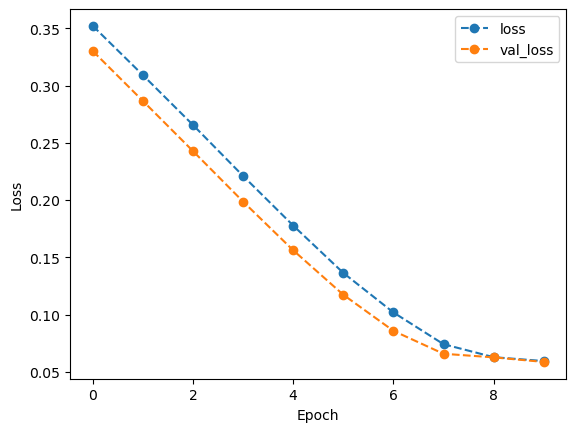

In [ ]:
vae.visualize_loss()

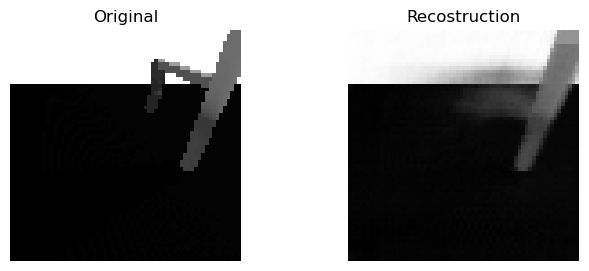

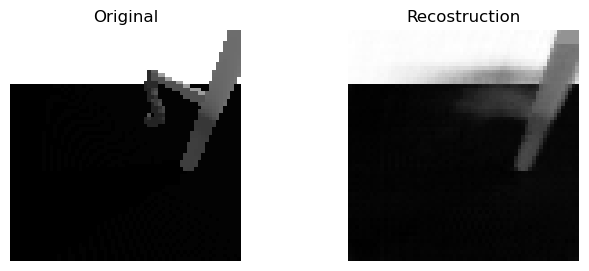

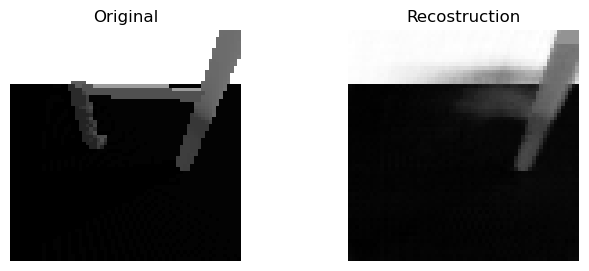

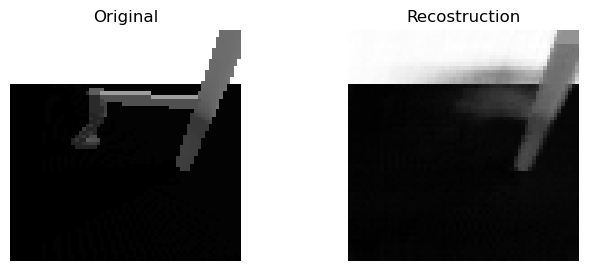

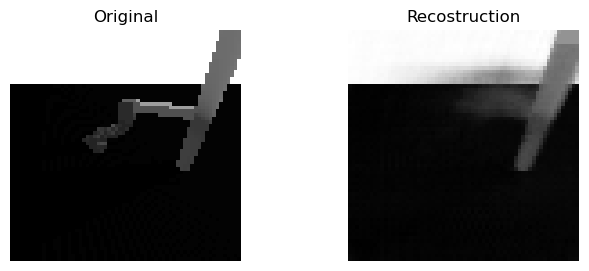

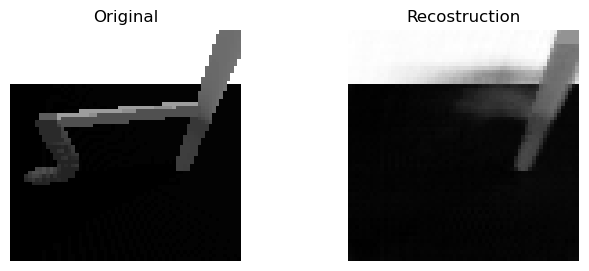

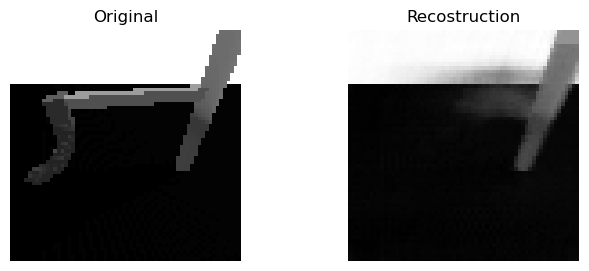

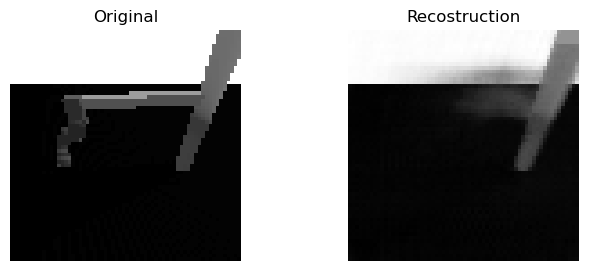

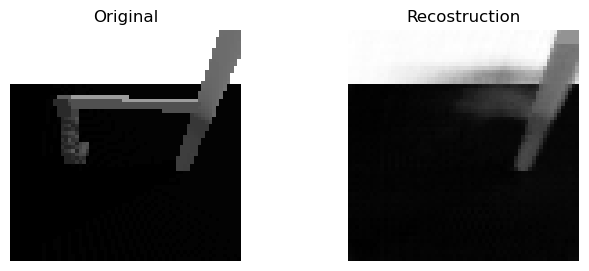

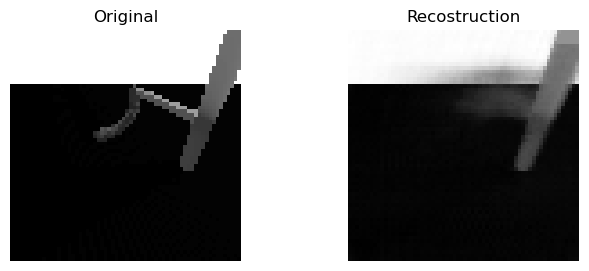

In [ ]:
for i in range(10):
    vae.visualize_recostruction(X_train[36+i*47])

In [ ]:
X_train_z = vae.compute_latent_vector(X_train)
X_val_z = vae.compute_latent_vector(X_val)
X_test_z = vae.compute_latent_vector(X_test)

69/69 [==============================] - 4s 59ms/step


In [ ]:
save_latent_vectors(X_train_z, None, 'predictions/z_vae_gray_scale_train.pkl')
save_latent_vectors(X_val_z, None, 'predictions/z_vae_gray_scale_val.pkl')
save_latent_vectors(X_test_z, None, 'predictions/z_vae_gray_scale_test.pkl')